# Data Preprocessing


[Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

### Importing libraries


In [255]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
import pycountry
import textdistance

In [256]:
books = pd.read_csv('data/Books.csv')
ratings = pd.read_csv('data/Ratings.csv')
users = pd.read_csv('data/Users.csv')

In [257]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg


In [258]:
books.info()
books.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


(271360, 8)

In [259]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [260]:
ratings.info()
ratings.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


(1149780, 3)

In [261]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [262]:
users.info()
users.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


(278858, 3)

In [263]:
# replacing '-' with '_' and features name in lower case
books.columns= books.columns.str.strip().str.lower().str.replace('-', '_')
users.columns= users.columns.str.strip().str.lower().str.replace('-', '_')
ratings.columns= ratings.columns.str.strip().str.lower().str.replace('-', '_')

In [264]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [265]:
# prevention of text clipping 
pd.set_option('display.max_colwidth', 1)

In [266]:
books.head(3)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg


In [267]:
# sum NaN values
print(books.isnull().sum())
print(users.isnull().sum())
print(ratings.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            3
dtype: int64
user_id     0     
location    0     
age         110762
dtype: int64
user_id        0
isbn           0
book_rating    0
dtype: int64


## Books dataset - dealing with NaN values

In [268]:
# check for null values in book author
books[books['book_author'].isna()]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [269]:
# no author dat for book isbn: book isbn - delete position
books = books.drop([118033], axis = 0)

# filling the null value for book isbn: 9627982032
books.loc[187689, 'book_author'] = 'Larissa Anne Downes'


In [270]:
# checking null values in publisher
books[books['publisher'].isna()]   

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [271]:
# replacing NaNs with correct  values
books.loc[128890, 'publisher'] = 'Mundania Press LLC'
books.loc[129037, 'publisher'] = 'Bantam'

In [272]:
# checking the values in year of publication
books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [273]:
# correcting publication companies 
books[books['year_of_publication'] == 'DK Publishing Inc']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [274]:
# after searching for these books we found out about its authors
#ISBN '078946697X'
books.loc[books.isbn == '078946697X','year_of_publication'] = 2000
books.loc[books.isbn == '078946697X','book_author'] = "Michael Teitelbaum"
books.loc[books.isbn == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.isbn == '078946697X','book_title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books.loc[books.isbn == '0789466953','year_of_publication'] = 2000
books.loc[books.isbn == '0789466953','book_author'] = "James Buckley"
books.loc[books.isbn == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.isbn == '0789466953','book_title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
     


In [275]:
#checking the rows having 'Gallimard' as year_of_publication
books.loc[books['year_of_publication'] == 'Gallimard',:]
     


,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [276]:
books.loc[books.isbn=='2070426769','year_of_publication']=2003
books.loc[books.isbn=='2070426769','book_author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.isbn=='2070426769','publisher']='Gallimard'
books.loc[books.isbn=='2070426769','book_title']="Peuple du ciel, suivi de 'Les Bergers"

In [277]:
# checking if the corrections are in place
books.loc[books['isbn'].isin(['2070426769','0789466953','078946697X'])]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [278]:
# changing dtype of year of publication
books['year_of_publication'] =books['year_of_publication'].astype(int)

In [279]:
books[(books['year_of_publication'] > 0) & (books['year_of_publication'] < 1800)]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [280]:
#replacing with correct  values
books.loc[books.isbn=='9643112136','year_of_publication'] = 2010
books.loc[books.isbn=='964442011X', 'year_of_publication'] = 1991

In [281]:
# sustituting np.Nan in rows with year = 0 or  greater than the current year,2024.
books.loc[(books['year_of_publication'] > 2024) | (books['year_of_publication'] == 0),'year_of_publication'] = np.NAN

# replacing NaN values with median value of year_of_publication
books['year_of_publication'].fillna(int(books['year_of_publication'].median()), inplace=True)

In [282]:
books['book_author'].value_counts()
books['publisher'].value_counts()

publisher
Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company    1   
Polaris Books                    1   
Hannover House                   1   
Amber Quill Press, LLC.          1   
Connaught                        1   
Name: count, Length: 16804, dtype: int64

In [283]:
# inspecting the missing values in 'publisher' column
books.loc[books.publisher.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l


In [284]:
# checking for duplicates
books[books.duplicated()]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l


In [285]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


## Users data

In [286]:
#displaying the top 10 and bottom 10 rows of the dataframe
pd.concat([users.head(10),users.tail(10)],axis=0)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [287]:
#Checking for duplicates in users_df
users[users['user_id'].duplicated()].sum() 

user_id     0  
location    0  
age         0.0
dtype: object

In [288]:
#users.isna().sum()

# percentage of missing values in users
print(users.isnull().sum()/len(users)*100)

user_id     0.000000 
location    0.000000 
age         39.719857
dtype: float64


In [289]:
# summarizing data in 'age' column
users['age'].describe()

count    168096.000000
mean     34.751434    
std      14.428097    
min      0.000000     
25%      24.000000    
50%      32.000000    
75%      44.000000    
max      244.000000   
Name: age, dtype: float64

<Axes: xlabel='age'>

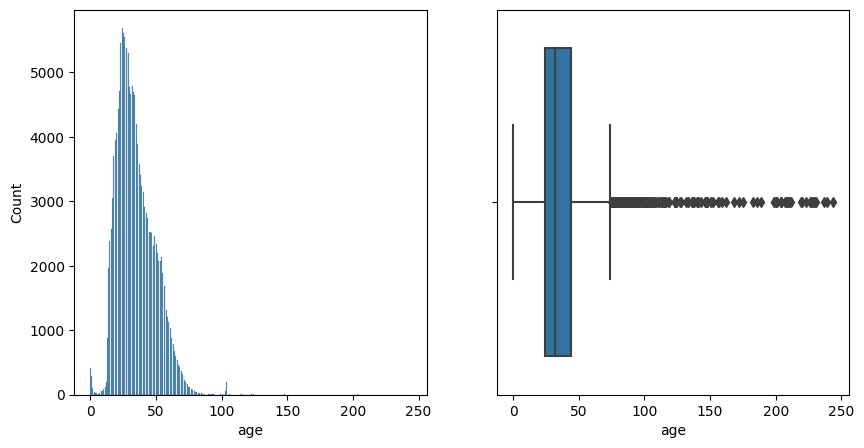

In [290]:

#Histogram showing distribution of ages
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='age',data=users)

#boxplot of age column
plt.subplot(1,2,2)
sns.boxplot(x='age',data=users)
     

In [291]:
# replacing outliers in 'age' with NaN
users.loc[(users['age']>95)|(users['age']<4),'age']=np.nan

In [292]:
# displaying the current number of missing values
print(users['age'].isnull().sum())
# imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users['age'].describe()
     


112001


count    166857.000000
mean     34.734222    
std      13.621521    
min      4.000000     
25%      24.000000    
50%      32.000000    
75%      44.000000    
max      95.000000    
Name: age, dtype: float64

In [293]:
# create a normal distribution pd.Series to fill NaN values
normal_age_series = pd.Series(np.random.normal(loc=users.age.mean(), scale=users.age.std(), size=users[users.age.isna()]['user_id'].count()))

# take the absolute value of temp_age_series
abs_age_series=np.abs(normal_age_series)

# sort users df so as NaN values in age to be first and reset index to match with index of abs_age_series. Then using fillna()
users = users.sort_values('age',na_position='first').reset_index(drop=True)
users.age.fillna(round(abs_age_series), inplace = True)  

In [294]:
users.age.describe()

count    278858.000000
mean     34.737824    
std      13.563480    
min      0.000000     
25%      25.000000    
50%      33.000000    
75%      44.000000    
max      100.000000   
Name: age, dtype: float64

In [295]:
# check null data
users['age'].isnull().sum()

0

In [296]:
# define age group of users

def age_group(age):
    if age<13:
        x='Children'
    elif age>=13 and age<18:
        x='Teens'
    elif age>=18 and age<36:
        x='Youth'
    elif age>=36 and age<56:
        x='Middle aged adults'
    else:
        x='Elderly'
    return x

In [297]:
users['age_group']=users['age'].apply(lambda x: age_group(x))

In [298]:
# number of unique values in 'location'
users['location'].nunique()

57339

In [299]:
#extracting the country names from users
for i in users:
    users['country']=users.location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [300]:
# displaying the country names
set(users['country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [301]:

#correcting the mispelled country names
users.loc[users['country'].isin(['australii','autralia','western australia']), 'country'] = 'australia'
users.loc[users['country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'country'] = 'usa'
users.loc[users['country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'country'] = 'uk'  
users.loc[users['country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'country'] = 'philippines'                                      
users.loc[users['country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'country'] = 'others'
users.loc[users['country'].isin([ 'italia','italien','itlay']), 'country'] = 'italy'
users.loc[users['country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'country'] = 'china'
users['country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)
 

In [302]:
# convert the country  to uppercase
users['country']=users['country'].str.upper()

In [303]:
users.drop('location',axis=1,inplace=True)

In [304]:
users.country.value_counts()

country
USA               139746
CANADA            21658 
UK                18565 
GERMANY           17074 
SPAIN             13258 
                  ...   
ROSARIO           1     
BURKINAFASU       1     
ADSGFDR           1     
HENRY             1     
SAN BERNARDINO    1     
Name: count, Length: 473, dtype: int64

## Ratings

In [305]:
# making all the ISBN no. uppercase
ratings['isbn'].apply(lambda x: x.upper())

0          034545104X 
1          0155061224 
2          0446520802 
3          052165615X 
4          0521795028 
              ...     
1149775    1563526298 
1149776    0679447156 
1149777    0515107662 
1149778    0590442449 
1149779    05162443314
Name: isbn, Length: 1149780, dtype: object

In [306]:
# checking for duplicates
ratings[ratings.duplicated()].sum()

user_id        0
isbn           0
book_rating    0
dtype: object

In [307]:
# check if all the books in ratings are also in books
ratings_new = ratings[ratings['isbn'].isin(books['isbn'])]

In [308]:
print('ratings: {} ratings_new: {}'.format(ratings.shape, ratings_new.shape))

ratings: (1149780, 3) ratings_new: (1031135, 3)


In [309]:
# book ratings
ratings_new['book_rating'].value_counts().reset_index()

,book_rating,count
0,0,647294
1,8,91804
2,10,71224
3,7,66402
4,9,60778
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375


In [310]:
# most popular books
ratings_new.groupby('isbn')['book_rating'].count().reset_index().sort_values(by='book_rating', ascending=False)[:10]

,isbn,book_rating
215951,0971880107,2502
38570,0316666343,1295
70798,0385504209,883
7344,0060928336,732
32370,0312195516,723
87397,044023722X,647
21342,0142001740,615
145042,067976402X,614
133142,0671027360,586
93847,0446672211,585


In [311]:
explicit_rating = ratings_new[ratings_new['book_rating'] != 0] # without 0
implicit_rating = ratings_new[ratings_new['book_rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383841, 3) and implicit rating: (647294, 3)


In [312]:
# most purchased books including the implicitely rated books
ratings_new.groupby('isbn')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False)[:10]['isbn'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [313]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books[books['isbn'].isin(isbn_nums)]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
118,0671027360,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star,http://images.amazon.com/images/P/0671027360.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.LZZZZZZZ.jpg
305,044023722X,A Painted House,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.LZZZZZZZ.jpg
356,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg
748,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg
1922,067976402X,Snow Falling on Cedars,David Guterson,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.LZZZZZZZ.jpg


In [314]:
# most popular explicitely rated books
explicit_rating.groupby('isbn')['book_rating'].count().reset_index().sort_values(by='book_rating', ascending=False)[:10]


# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books[books['isbn'].isin(isbn_nums)]
     

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
748,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg


## Merging data

In [315]:
# for the rating dataset, we are only taking the explicit rating dataset
df = pd.merge(books, explicit_rating, on='isbn', how='inner')
df = pd.merge(df, users, on='user_id', how='inner')

In [316]:
df.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,age,age_group,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,31.0,Youth,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg,8,5,31.0,Youth,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.LZZZZZZZ.jpg,8,5,31.0,Youth,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1552041778.01.LZZZZZZZ.jpg,8,5,31.0,Youth,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1567407781.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1567407781.01.LZZZZZZZ.jpg,8,6,31.0,Youth,CANADA


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383841 entries, 0 to 383840
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 383841 non-null  object 
 1   book_title           383841 non-null  object 
 2   book_author          383841 non-null  object 
 3   year_of_publication  383841 non-null  float64
 4   publisher            383841 non-null  object 
 5   image_url_s          383841 non-null  object 
 6   image_url_m          383841 non-null  object 
 7   image_url_l          383840 non-null  object 
 8   user_id              383841 non-null  int64  
 9   book_rating          383841 non-null  int64  
 10  age                  383841 non-null  float64
 11  age_group            383841 non-null  object 
 12  country              383841 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 38.1+ MB


In [318]:
df.to_csv('prepared_data.csv')